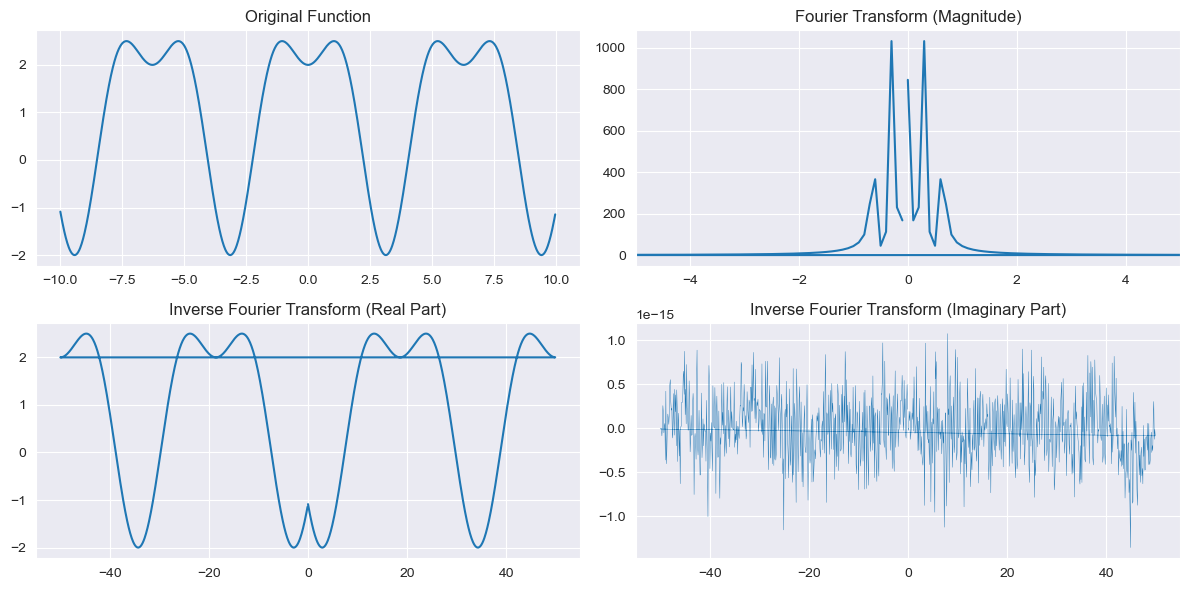

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compute_fourier_transform(signal, dt):
    N = len(signal)
    freqs = np.fft.fftfreq(N, dt)
    fourier = np.fft.fft(signal)
    return freqs, fourier

def compute_inverse_fourier_transform(fourier, dt):
    N = len(fourier)
    time = np.fft.fftfreq(N, dt)
    inverse_fourier = np.fft.ifft(fourier)
    return time, inverse_fourier

# Define your function here. Example: a Gaussian pulse
def your_function(t):
    return (2*np.cos(t))+(2*(np.sin(t))**2)

# Parameters
T = 10.0  # Total time
N = 1000  # Number of data points
dt = T / N  # Time step

# Create time values
t = np.linspace(-T, T, N, endpoint=False)

# Compute the function values
signal = your_function(t)

# Compute Fourier Transform
freqs, fourier = compute_fourier_transform(signal, dt)

# Compute Inverse Fourier Transform
time, inverse_fourier = compute_inverse_fourier_transform(fourier, dt)



sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))

# Plot the original function
plt.subplot(2, 2, 1)
plt.plot(t, signal)
plt.title("Original Function")

# Plot the Fourier Transform (magnitude)
plt.subplot(2, 2, 2)
plt.plot(freqs, np.abs(fourier))
plt.xlim(-5,5)
plt.title("Fourier Transform (Magnitude)")

# Plot the Inverse Fourier Transform (real part)
plt.subplot(2, 2, 3)
plt.plot(time, np.real(inverse_fourier))
plt.title("Inverse Fourier Transform (Real Part)")

# Plot the Inverse Fourier Transform (imaginary part)
plt.subplot(2, 2, 4)
plt.plot(time, np.imag(inverse_fourier), linewidth=0.3)
plt.title("Inverse Fourier Transform (Imaginary Part)")


plt.tight_layout()
plt.show()


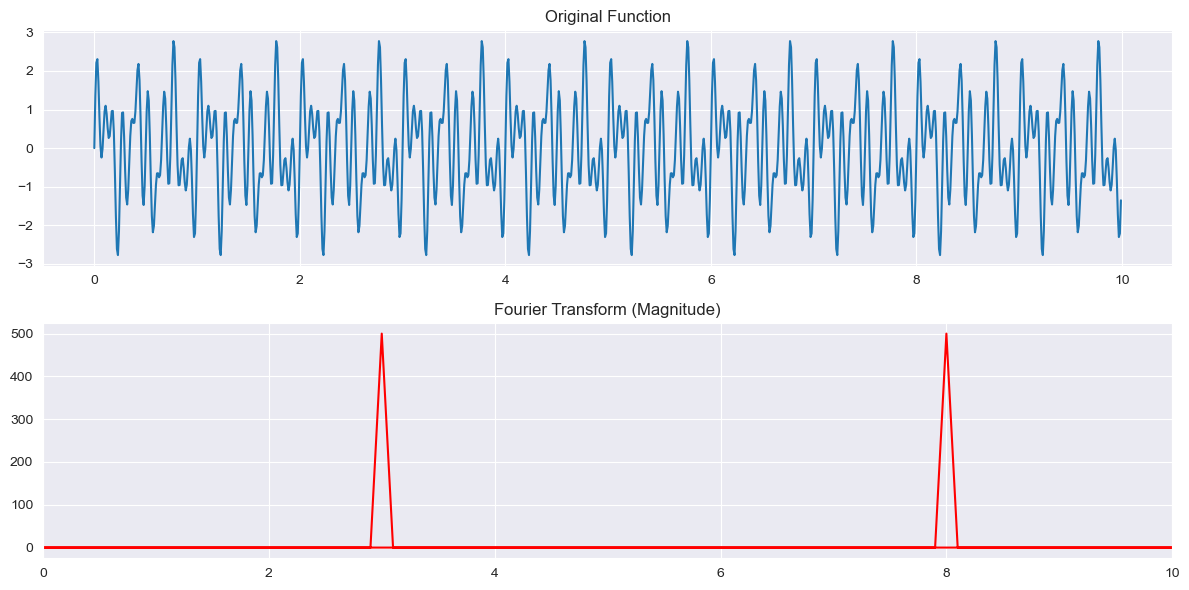

In [26]:
def compute_fourier_transform(signal, dt):
    N = len(signal)
    freqs = np.fft.fftfreq(N, dt)
    fourier = np.fft.fft(signal)
    return freqs, fourier

# Create time values
T = 10.0  # Total time
N = 1000  # Number of data points
dt = T / N  # Time step
t = np.linspace(0, T, N, endpoint=False)

# Create an arbitrary function composed of different frequencies
freq1 = 6.0  # Frequency 1
freq2 = 2.0  # Frequency 2
freq3 = 8.0  # Frequency 3

signal = np.sin(4 * np.pi * freq1 * t) + np.sin(3 * np.pi * freq2 * t) + np.sin(2 * np.pi * freq3 * t)

# Compute Fourier Transform
freqs, fourier = compute_fourier_transform(signal, dt)

# Plot the original function
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Original Function")

# Plot the Fourier Transform (magnitude)
plt.subplot(2, 1, 2)
plt.plot(freqs, np.abs(fourier), color='r')
plt.xlim(0,10)
plt.title("Fourier Transform (Magnitude)")

plt.tight_layout()
plt.show()


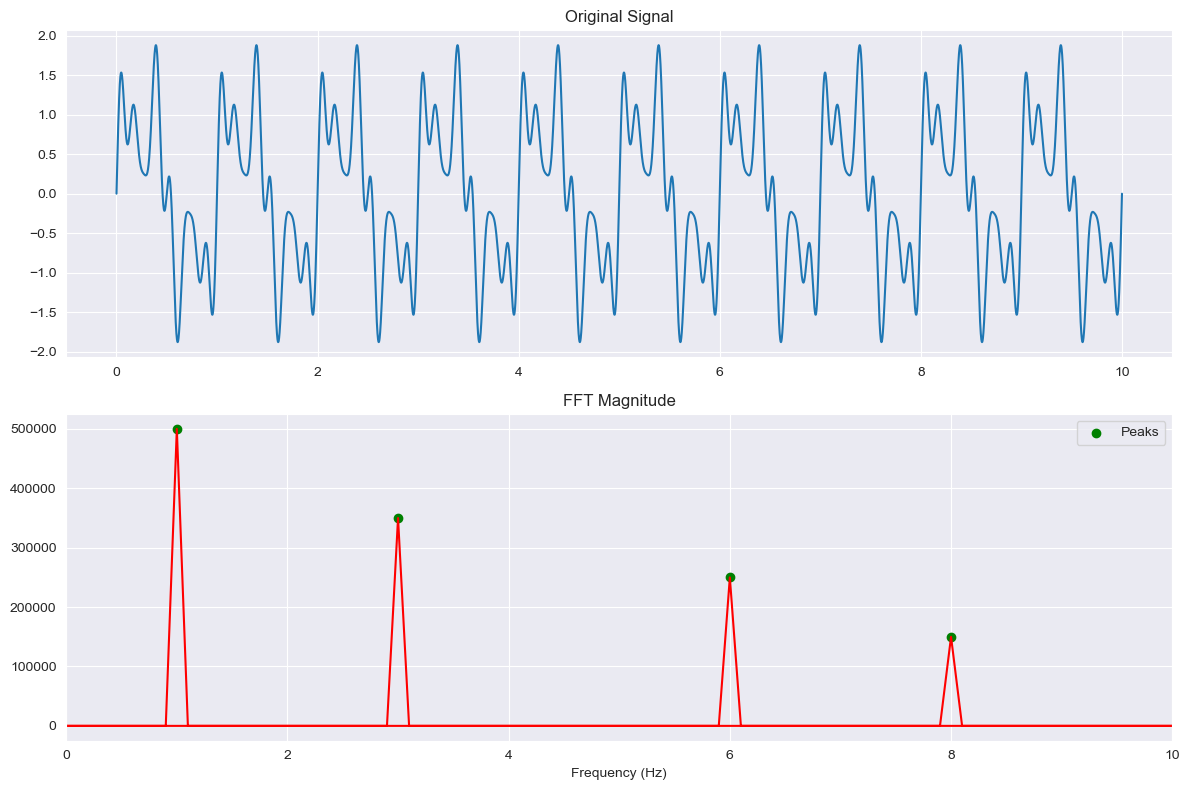

Identified peak frequencies (Hz): [ 1.  3.  6.  8. -8. -6. -3. -1.]


In [31]:
# Define time parameters
T = 10.0  # Total time
N = 1000000  # Number of data points
dt = T / N  # Time step
t = np.linspace(0, T, N, endpoint=False)

# Define the frequencies and amplitudes of the components
frequencies = [1.0, 3.0, 6.0, 8.0]
amplitudes = [1.0, 0.7, 0.5, 0.3]

# Create the signal by combining sinusoidal components
signal = np.sum([amplitude * np.sin(2 * np.pi * freq * t) for freq, amplitude in zip(frequencies, amplitudes)], axis=0)

# Compute the FFT
fft_result = np.fft.fft(signal)
freqs = np.fft.fftfreq(N, dt)

# Find the peaks in the FFT magnitude
magnitude = np.abs(fft_result)
peaks = np.where(magnitude > np.max(magnitude) * 0.1)  # Adjust the threshold as needed

# Plot the original signal
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Original Signal")

# Plot the FFT magnitude
plt.subplot(2, 1, 2)
plt.plot(freqs, magnitude, color='r')
plt.title("FFT Magnitude")
plt.xlabel("Frequency (Hz)")
plt.xlim(0,10)

# Mark the peaks on the FFT plot
plt.scatter(freqs[peaks], magnitude[peaks], marker='o', color='g', label='Peaks')
plt.legend()

plt.tight_layout()
plt.show()

# Display the identified peak frequencies
peak_frequencies = freqs[peaks]
print("Identified peak frequencies (Hz):", peak_frequencies)
